<a href="https://colab.research.google.com/github/zzhining/data_visualization/blob/main/insurace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [13]:
sns.set(style="whitegrid")

df = pd.read_csv("https://raw.githubusercontent.com/zzhining/data_visualization/main/dataset/insurance.csv?token=GHSAT0AAAAAAB4ACKNPXADQAAON3WYXCUZIY4NZ2SA")
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA
----


주어진 데이터에서 아래 항목을 확인해보는 방법은?
- age의 범위
- sex의 유형
- bmi의 범위
- children의 범위
- smoker의 yes/no 각각 몇명?
- region의 유형?
- charges의 범위


----

*해결방법*

1) pandas를 사용하는 방법
 - describe(): 수치형 데이터의 범위를 확인
 - unique(): 범주형 데이터의 유형을 확인(예: 남/여, SE/SW/NE/NW)
 - value_counts(): 범주형 데이터의 유형별 개수 확인
 
 
2) seaborn을 사용하는 방법
 - histplot() : 연속형(수치형)데이터의 구간별 개수
 - countplot() : 범주형 데이터의 유형별 개수 확인(pd의 value_counts()의 결과를 시각화)
 

In [14]:
# 수치 데이터(age, bmi, children, charges)의 범위 확인
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### histplot

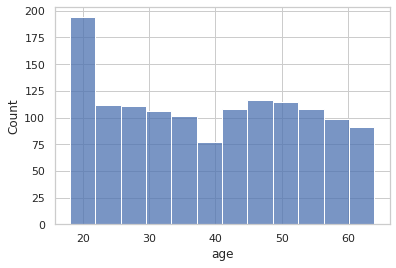

In [15]:
# 수치 데이터의 범위를 시각화를 통해서 확인 -> histplot(히스토그램)
# barplot(막대), scatterplot(산점도), lineplot(선), countplot(막대, y축이 개수)
# histplot(히스토그램), regplot(산점도 + 회귀선), heatmap(히트맵),....

# age 컬럼에 대해 히스토그램을 그려서, 범위를 확인해보자!
sns.histplot(data=df['age'])

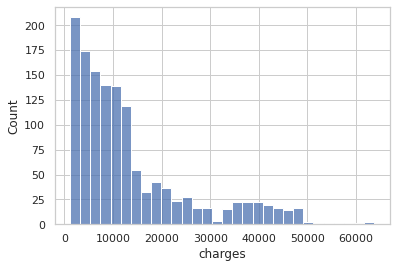

In [16]:
# charges 컬럼에 대해 히스토그램을 그려서, 범위를 확인해보자!
sns.histplot(data=df['charges'])

In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
#region의 유형?
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
#region의 유형별 갯수
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### countplot

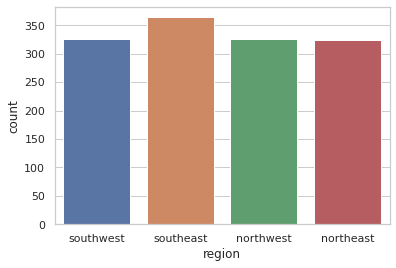

In [20]:
#region의 유형별 갯수 --> 시각화("countplot!!!", histplot)
sns.countplot(x=df['region'])

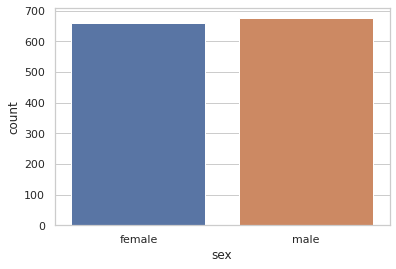

In [21]:
#sex에 따른 개수 -> 시각화
sns.countplot(x=df['sex'])

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### scatterplot

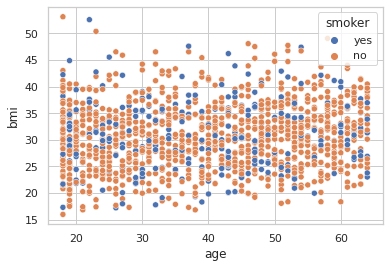

In [23]:
# 상관관계가 궁금할 때? 
# pandas: corr()
# seaborn: scatterplot()

# age와 bmi의 상관관계
sns.scatterplot(x=df['age'], y=df['bmi'], hue=df['smoker'])

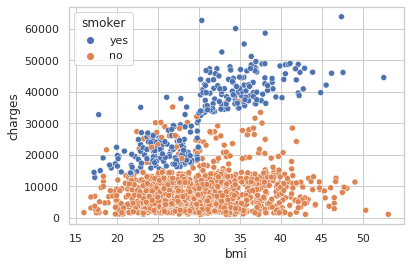

In [24]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])

In [25]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### boxplot

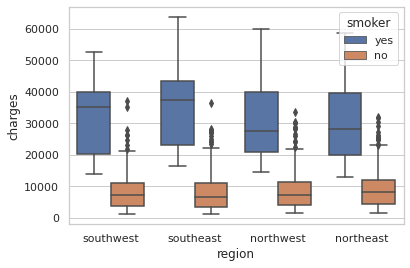

In [26]:
# 막대그래프, x축이 범주형(카테고리)
sns.boxplot(x=df['region'], y=df['charges'], hue=df['smoker'])

### lineplot

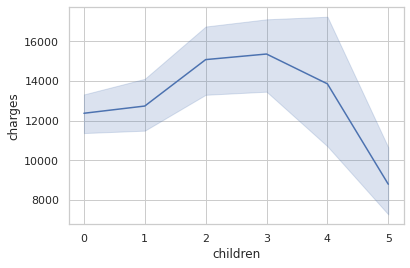

In [27]:
sns.lineplot(x=df['children'], y=df['charges'])

### swarmplot

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


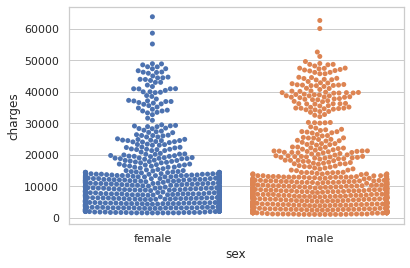

In [28]:
sns.swarmplot(x=df['sex'], y=df['charges'])

### regplot, scatterplot, lmplot

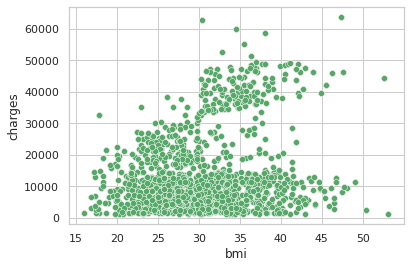

In [29]:
sns.scatterplot(x=df.bmi, y=df.charges) 
sns.scatterplot(x=df['bmi'], y=df['charges']) 
sns.scatterplot(x='bmi', y='charges', data = df) 

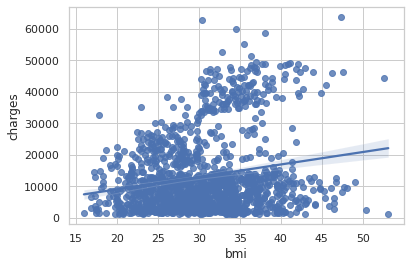

In [30]:
sns.regplot(x='bmi', y='charges', data = df) 

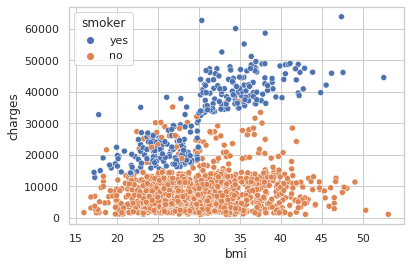

In [31]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data = df) 

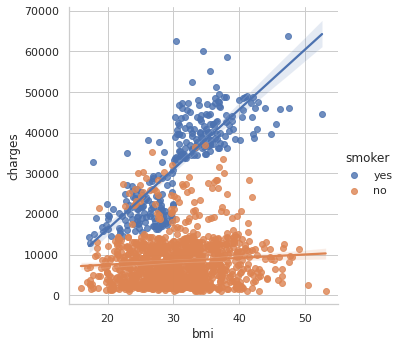

In [32]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df) 

### barplot

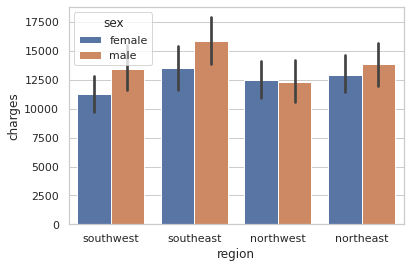

In [33]:
sns.barplot(x = 'region', y= 'charges', hue = 'sex', data = df)